# Projet numérique de probabilités 

## Préambule

Dans ce projet, on va chercher à développer un algorithme permettant de générer des textures aléatoires reprenant certaines caractéristiques du mouvement brownien.
Dans un premier temps, on va s'intéresser à construire le mouvement brownien en une dimension comme limite d'une marche aléatoire. On verra ensuite une construction alternative qui permettra de conserver certaines de ses propriétés puis on la généralisera à 2 dimensions.


# Marche aléatoire

Soit $(X_i)_{i\in \mathbb{N}^\ast}$ une suite de variables aléatoires indépendantes telle que :

$$\mathbb{P}(X_i=x) = \left\{\begin{array}{ll}
\frac{1}{2} & \text{ si } x=1\\
\frac{1}{2} & \text{ si } x=-1\\
\end{array}\right.
\forall i\geq 1$$

On considère la suite $(Y_n)_{n \in \mathbb{N}}$, où $Y_0 = 0$ et 
$$Y_n=\sum_{i=1}^{n}X_i$$


1. Calculer l'espérance et la variance de $X_i$.
2. En déduire l'espérance et la variance de $Y_n$.
3. Montrer que $\forall n \in \mathbb{N}$, $\mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}$. On dit que la suite $(Y_n)_{n \in \mathbb{N}}$ possède la propriété de Markov.
4. Montrer que $\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')$ puis que $\frac12\mathbb{E}\left(Y_n-Y_{n+h}\right)^2 = h/2$, pour $h>0$. Cette dernière quantité s'appelle le variogramme de $Y_n$ et peut s'interpréter comme une quantification de sa régularité.
5. Utiliser le théorème central limite pour montrer que
  $$\frac{Y_n}{\sqrt{n}}\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1),$$


**Réponse n° 1 :** \
On a directement l'espérance de $X_i$ :
$$
\begin{align*}
\boxed{\forall{i}\ge1, \;\mathbb{E}(X_i) = 1\times\frac{1}{2} + (-1)\times\frac{1}{2} = 0}
\end{align*}
$$

Et sa variance s'obtient avec la formule de Koenig-Huygens : 
$$
\begin{align*}
\boxed{\forall{i}\ge1,\;\mathbb{V}(X_i) = \mathbb{E}(X_i^2) - \mathbb{E}(X_i)^2 = 1 }
\end{align*}
$$

**Réponse n° 2 :** \
Par linéarité de l'espérance on obtient :

$$
\begin{align*}
\boxed{\forall{n}\ge1, \mathbb{E}(Y_n) = \sum_{i=1}^{n}\mathbb{E}(X_i) = 0}
\end{align*}
$$

Par ailleurs, les $X_i$ étant indépendantes, on a : 

$\forall{i \ne j}, \mathbb{V}(X_i + X_j) = \mathbb{V}(X_i) + \mathbb{V}(X_j) + 2\mathbb{cov}(X_i, X_j) = \mathbb{V}(X_i) + \mathbb{V}(X_j)$

Et donc : 
$$
\begin{align*}
\boxed{\mathbb{V}(Y_n) = \mathbb{V}(\sum_{i=1}^{n}X_i) = \sum_{i=1}^{n}\mathbb{V}(X_i) = n}
\end{align*}
$$


**Réponse n° 3 :** \
Par une démonstration par récurrence sur $n \in \mathbb{N^*}$ .

Initialisation : \
Pour $n=1$, on a directement le résultat vérifié.

Hérédité : \
Supposons que la propriété est vérifiée jusqu'au rang $n\in\mathbb{N^*}$. \
$\forall{i} \in\mathbb{N^*}$ tel que $1\le i\le n$, $\mathbb{P}_{Y_i|Y_{i-1} = y_{i-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_i|Y_{i-1} = y_{i-1}}$ \
Montrons qu'elle est encore vraie au rang $n+1$ :
<!-- 
La preuve repose sur l'utilisation de la formule des probabilités composées, avec des évènements $(A_n)_{n\in\mathbb{N}}$ :

$$
\forall n \in \mathbb{N}, \; \mathbb{P}(A_1\cap\cdots\cap A_n) = \mathbb{P}(A_1)\times\mathbb{P}_{A_1}(A_2)\times\mathbb{P}_{A_1\cap A_2}(A_3)\times\cdots\times\mathbb{P}_{A_1\cap\cdots\cap A_{n-1}}(A_n).
$$

Donc :
$$
\mathbb{P}(A_{n+1}) = \frac{\mathbb{P}(A_1\cap\cdots\cap A_{n+1})} {\mathbb{P}(A_1)\times\mathbb{P}_{A_1}(A_2)\times\mathbb{P}_{A_1\cap A_2}(A_3)\times\cdots\times\mathbb{P}_{A_1\cap\cdots\cap A_{n}}(A_{n+1})}
$$

Ici on prend $A_i = (Y_i = y_i) = (\sum_{i=1}^{n}X_i = y_i)$, donc: -->

Tout d'abord, on a par indépendance des $(X_i)_{i\in\mathbb{N}}$: 
$$
\begin{align*}
\mathbb{P}(Y_1 = y_1\cap\cdots\cap Y_{n+1}= y_{n+1}) &= \mathbb{P}(X_1 = y_1, \cap X_2 = y_2-y_1, \cdots\cap X_{n+1}= y_{n+1}-y_n) \\
&= \mathbb{P}(X_1=y_1)\times\mathbb{P}(X_2=y_2-y_1)\cdots\times\mathbb{P}(X_{n+1}=y_{n+1}-y_n) \\
\end{align*}
$$

Par ailleurs, $\mathbb{P}(Y_1=y_1)=\mathbb{P}(X_1=y_1)$ et en utilisant l'hypothèse de récurrence : 
$$
\begin{align*}
\forall{i} \in\mathbb{N^*} , 1\le i\le n \;, \mathbb{P}_{Y_i|Y_{i-1} = y_{i-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_i|Y_{i-1} = y_{i-1}} \\
\end{align*}
$$
donc :
$$
\begin{align*}
\mathbb{P}_{Y_0=y_0, \cdots, Y_{i-1}=y_{i-1}}(Y_i = y_i) &= \mathbb{P}_{Y_{i-1}=y_{i-1}}(Y_i=y_i) \\
&= \mathbb{P}(X_i=y_i-y_{i-1})
\end{align*}
$$
Par la formule des probabilités composées : 
$$
\begin{align*}
\forall n \in \mathbb{N}, \; \mathbb{P}(Y_1\cap\cdots\cap Y_n) = \mathbb{P}(Y_1)\times\mathbb{P}_{Y_1}(A_2)\times\mathbb{P}_{Y_1\cap Y_2}(Y_3)\times\cdots\times\mathbb{P}_{Y_1\cap\cdots\cap Y_{n-1}}(Y_n).
\end{align*}
$$
donc :
$$
\begin{align*}
\forall n \in \mathbb{N}, \; \mathbb{P}(Y_{n+1}) = \frac{\mathbb{P}(Y_1\cap\cdots\cap Y_{n+1})} {\mathbb{P}(Y_1)\times\mathbb{P}_{Y_1}(Y_2)\times\mathbb{P}_{Y_1\cap Y_2}(Y_3)\times\cdots\times\mathbb{P}_{Y_1\cap\cdots\cap Y_{n-1}}(Y_{n})}
\end{align*}
$$
et on obtient finalement : 
$$
\begin{align*}
\mathbb{P}(Y_{n+1}=y_{n+1}) &= \frac{\mathbb{P}(X_1=y_1)\times\mathbb{P}(X_2=y_2-y_1)\cdots\times\mathbb{P}(X_{n+1}=y_{n+1}-y_n)} {\mathbb{P}(Y_1=y_1)\times\mathbb{P}(X_2=y_2-y_1)\cdots\times\mathbb{P}(X_n=y_n-y_{n-1})} \\
&= \mathbb{P}(X_{n+1}=y_{n+1}-y_n) \\
&= \mathbb{P}_{Y_{n+1}|Y_n=y_n}(y_{n+1})
\end{align*}
$$
La récurrence étant achevée, on a : 
$$
\begin{align*}
\boxed{\forall n \in \mathbb{N}, \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}, \ldots, Y_{0} = y_{0}} = \mathbb{P}_{Y_n|Y_{n-1} = y_{n-1}}}
\end{align*}
$$

**Réponse n° 4 :** \
Tout d'abord on a :

$\mathrm{Cov}(Y_n,Y_{n'}) = \mathbb{E}(Y_nY_{n'}) - \mathbb{E}(Y_n)\mathbb{E}(Y_{n'}) = \mathbb{E}(Y_nY_{n'})$ , car $\mathbb{E}(Y_n) = \mathbb{E}(Y_{n'}) = 0  \; (1)$

Ensuite :

$Y_nY_{n'} = (\sum_{i=1}^{n}X_i)(\sum_{i=1}^{n'}X_i) = \sum_{i=1}^{\min(n,n')}X_i^2 + \sum_{(i,j) \in E}X_iX_j $ avec E un ensemble de couple $(i,j)$ tels que $ i\neq j $, cet ensemble est le fruit de tous les produits croisés.

Comme par indépendance de $X_i $ et $ X_j$ :

$\forall{(i, j)}$,  $i \neq j , \mathbb{E}(X_iX_j) = \mathbb{E}(X_i)\mathbb{E}(X_j) = 0 $

En reprenant l'expression initiale de la covariance $(1)$ et par linéarité de l'espérance :

$\mathrm{Cov}(Y_n,Y_{n'}) = \sum_{i=1}^{\min(n,n')}\mathbb{E}(X_i^2) = \sum_{i=1}^{\min(n,n')}\mathbb{V}(X_i) = \min(n,n') \times \mathbb{V}(X_1)$

Donc finalement comme $\forall{i} \in \mathbb{N^*}, \;\mathbb{V}(X_i) = 1$ on a :
$$
\boxed{\mathrm{Cov}(Y_n,Y_{n'}) = \min(n,n')}
$$



Ensuite on a :
$$
\begin{align*}
(Y_n-Y_{n+h}) = - \sum_{i=n+1}^{n+h}X_i \\
(Y_n-Y_{n+h})^2 = \sum_{i=n+1}^{n+h}X_i^2 + \sum_{(i,j) \in E} X_iX_j 
\end{align*}
$$
*Avec E un ensemble de couple $(i,j)$ tels que $ i\neq j $, cet ensemble est le fruit de tous les produits croisés.*

Comme précédemment, par indépendance de $X_i $ et $ X_j$ :
$\forall{(i, j)}$,  $i \neq j , \mathbb{E}(X_iX_j) = \mathbb{E}(X_i)\mathbb{E}(X_j) = 0 $

donc :

$$
\mathbb{E}(Y_n-Y_{n+h})^2 = \sum_{i=n+1}^{n+h}\mathbb{E}(X_i^2) = \sum_{i=n+1}^{n+h} 1 = n+h - (n-1) - 1 = h
$$

et finalement :
$$
\boxed{\frac12\mathbb{E}\left(Y_n-Y_{n+h}\right)^2 = h/2}
$$

**Réponse n° 5 :** \

In [2]:
# chargement de dépendances
%pylab inline
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [3]:
# Initialisation de la graine
np.random.seed(1234)

# Comportement asymptotique

On introduit maintenant $t_i=\frac{i}{n}, i=0,\ldots,n$ et
$$Z^{(n)}_t= \frac{Y_{[nt]}}{\sqrt{n}}, t\in[0,1],$$
où $[\cdot]$ est la partie entière.

1. Montrer que $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}]$ forme une partition de $(0,1]$.

2. Montrer que $Z^{(n)}_t=Z^{(n)}_{t_i}$ pour $i=[nt]$.

3. Par conséquent, $Z^{(n)}_t, t\in[0,1]$ est bien défini $\forall t \in [0,1]$. Implémenter un algorithme pour simuler $Z^{(n)}_t$ aux points $t_i,~ i \in\{0,\ldots,n\}$. Représenter une trajectoire pour $n$=1000.



**Réponse n° 1 :** 

$\bigcup_{i=0}^{n-1}(t_i,t_{i+1}] = (t_0, t_1] \cup (t_1, t_2]... \cup \ (t_{n-1}, t_n]$ avec $t_0 = 0 $ et $ t_n = 1$  

Donc $\bigcup_{i=0}^{n-1}(t_i,t_{i+1}] = (0,1]$  
  
De plus, les $ (t_i,t_{i+1}] $ étant par ailleurs disjoints on a que :

$$\boxed{\bigcup_{i=0}^{n-1}(t_i,t_{i+1}] \text{ forme une partition de } (0,1]}$$


**Réponse n° 2 :** 

$Z^{(n)}_{t_i} = \frac{Y_{[nt_i]}}{\sqrt{n}} = \frac{Y_{[i]}}{\sqrt{n}}$  par définition de $t_i$.

Puis $\frac{Y_{[i]}}{\sqrt{n}} = \frac{Y_{[nt]}}{\sqrt{n}}$ comme $i=[nt]$  

Donc $$\boxed{Z^{(n)}_{t_i} =Z^{(n)}_{t}}$$

**Réponse n° 3 :** 

In [30]:
def Z_t(n) :
    list_Z_n = [0]
    U = sps.uniform.rvs(size=n)
    Y = 0 
    for u in U:
        if u < 0.5:
            Y += 1
        else :
            Y-=1
        list_Z_n.append(Y/np.sqrt(n))
    return list_Z_n
    

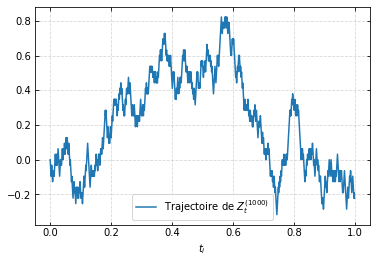

In [31]:
n=1000
plt.plot([i/n for i in range(n)], Z_t(n)[:-1], label = "Trajectoire de $Z_t^{(1000)}}$")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.xlabel("$t_i$")
plt.legend()

4. Montrer que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$, en déduire la loi de $Z^{(n)}_1=\frac{Y_n}{\sqrt{n}}$ quand $n$
  tend vers l'infini.
  Construire un échantillon de taille 1000 de valeurs de $Z^{(n)}_1$ pour n = 1000. Représenter son histogramme et le comparer avec la densité gaussienne standard.



**Réponse n° 4 :** 

Soit $t \in [0,1]$  
$Z^{(n)}_t = \frac{Y_{[nt]}}{\sqrt{n}} = \frac{1}{\sqrt{n}}\sum_{i=1}^{[nt]}X_i = \sum_{i=1}^{[nt]}\frac{X_i}{\sqrt{n}}  $  

  
Posons $S_n$ la somme des $X_i$, variables indépendantes, de même loi et de carré intégrable, d'espérance 0 et de variance 1.  

Par le théorème centrale limite : 
$ \frac{S_{[nt]}}{\sqrt{[nt]}} $ converge en loi vers $\mathcal{N}(0,1)$


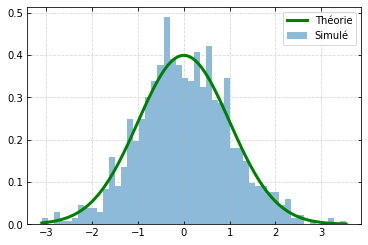

In [32]:
length = 1000
n = 1000

def simulation_Z_1(length, n):
    list_Z_1 = [0]
    for k in range(length):
        U = sps.uniform.rvs(size=n)
        Y = 0 
        for u in U:
            if u < 0.5:
                Y += 1
            else :
                Y-=1
        list_Z_1.append(Y/np.sqrt(n))
    return list_Z_1

list_Z_1 = simulation_Z_1(length, n)
plt.hist(list_Z_1, bins=50, density=True, alpha=0.5, label = "Simulé")
interval = np.linspace(min(list_Z_1), max(list_Z_1), 100)
plt.plot(interval, sps.norm.pdf(interval), 'g', lw=3, label="Théorie")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.legend()

**Analyse :** \
On remarque, grâce à la simulation que $Z^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,t),~\forall t \in [0,1]$. En effet, si l'on augmente $n$, la courbe simulée se rapproche de la courbe théorique correspondant à une loi normale centrée. Comme dans le cas de la simulation, $t = 1$, on retrouve que $Z^{(n)}_1\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$ qui correspond à une loi normale centrée réduite.



**Remarque**

${\bf Z}_t=\lim_{n \to \infty} Z^{(n)}_t$ est le mouvement brownien standard sur $[0,1]$. 


# Une construction alternative

On considère maintenant la construction suivante, définie pour tout $t \in [0,1]$:
$$\tilde{Z}^{(n)}_t = \frac{1}{\sqrt{n}}\sum_{i=1}^n X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t))$$
où les $X_i$ sont définis tels que précédemment et les $U_i$ sont des variables aléatoires i.i.d. de loi uniforme sur $[0,1]$.
Cette construction permet de définir un algorithme alternatif de simulation d'une (approximation de) trajectoire brownienne, cette fois-ci non standard au sens où on n'a pas systématiquement $\tilde{Z}^{(n)}_0 = 0$.

1. Discrétiser l'intervalle $[0,1]$ en 1000 points de manière régulière et implémenter l'algorithme (commencer par n = 1). Représenter une trajectoire pour $n = 1000$.

**Réponse n° 1 :**

In [43]:
n=1000
interval = np.linspace(0,1,n)

def Ztilde_t(n, interval):
    list_Ztilde_t  =[]
    ztilde = 0
    for i in interval:
        x = sps.bernoulli.rvs(1/2)
        if x == 0 :
            x = -1
        u = sps.uniform.rvs()
        ztilde += x*(1*(i <= u ) - 1*(i > u))
        list_Ztilde_t.append(ztilde/np.sqrt(n))
    return list_Ztilde_t
    


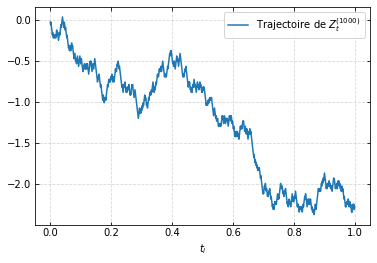

In [45]:
n=1000
plt.plot(interval, Ztilde_t(n, interval), label = "Trajectoire de $\overset{~}{Z}_t^{(1000)}}$")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.xlabel("$t_i$")
plt.legend()

2. Calculer l'espérance et la variance de $\tilde{Z}^{(n)}_t$. En déduire que $\forall t \in [0,1],~ \tilde{Z}^{(n)}_t\xrightarrow[n \to \infty]{\mathcal{L}}\mathcal{N}(0,1)$. Le vérifier expérimentalement aux points $\{0,0.25,0.5,0.75,1\}$ sur la base d'un échantillon de 1000 réalisations de $\tilde{Z}^{(n)}$.

**Réponse n° 2 :**
$$
\mathbb{E}(\tilde{Z}^{(n)}_t) = \frac{1}{\sqrt{n}}\sum_{i=1}^n \mathbb{E}(X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t)))
$$
Or par linéarité puis indépendance des $X_i$ et des $U_i$:

$$
\begin{align*}
\forall{i}, \; \mathbb{E}(X_i (1_{[0,U_i]}(t)-1_{]U_i,1]}(t)) &= \mathbb{E}(X_i)\times \mathbb{E}(1_{[0,U_i]}(t)) 
- \mathbb{E}(X_i)\times\mathbb{E}(1_{]U_i,1]}(t)) \\
&= 0
\end{align*} 
$$

D'où
$$\boxed{\mathbb{E}(\tilde{Z}^{(n)}_t) = 0}
$$

Et de même par indépendance des variables:
$$
\mathbb{V}(\tilde{Z}^{(n)}_t) = \frac{1}{n}\sum_{i=1}^n \mathbb{V}(X_i 1_{[0,U_i]}(t)- X_i 1_{]U_i,1]}(t))
$$

In [50]:
def simulation_Ztilde(length, n, interval):
    list_Ztilde = []
    for k in range(length):
        ztilde = 0
        for i in interval:
            x = sps.bernoulli.rvs(1/2)
            if x == 0 :
                x = -1
            u = sps.uniform.rvs()
            ztilde += x*(1*(i <= u ) - 1*(i > u))
        list_Ztilde.append(ztilde/np.sqrt(n))
    return list_Ztilde

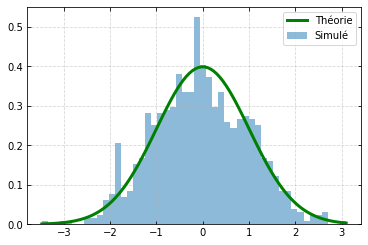

In [51]:
length = 1000
n = 1000
interval = np.linspace(0,1,n)

list_Ztilde = simulation_Ztilde(length, n, interval)
plt.hist(list_Ztilde, bins=50, density=True, alpha=0.5, label = "Simulé")
interval = np.linspace(min(list_Ztilde), max(list_Ztilde), 100)
plt.plot(interval, sps.norm.pdf(interval), 'g', lw=3, label="Théorie")
plt.tick_params(top=True,right=True,direction='in')
plt.grid(linestyle='--',alpha=0.5)
plt.legend()

3. Montrer que $\frac12\mathbb{E}\left(\tilde{Z}^{(n)}_t-\tilde{Z}^{(n)}_{t+h}\right)^2 = h$ pour $h>0$ et tel que $t+h \leq 1$.

4. Le vérifier expérimentalement en calculant $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$, où $\text{card}\{(i,j),|t_i-t_j|=h\}$ représente le nombre de couples $(t_i,t_j)$ distants de $h$, pour $h \in \{0.001,0.002,\ldots,0.3\}$. Représenter graphiquement cette quantité.

5. Décrire les différences et les similarités entre les deux approches.

# Génération de texture

L'algorithme précédent présente la propriété d'être aisément généralisable aux dimensions supérieures, contrairement au premier. Nous allons maintenant construire pas à pas un algorithme pour simuler selon ce modèle sur le domaine $[-1, 1]^2$. Comme dans le cas 1D, on va procéder par séparations aléatoires du domaine. Pour ce faire, nous allons simuler des droites aléatoires, avec la paramétrisation suivante :
$$x \cos(\alpha) + y \sin(\alpha) = p,$$
où $x,y \in [0,1]$ sont les coordonnées, $\alpha \sim \mathcal{U}_{[0,\pi]}$ est la variable d'*orientation*, $p \sim \mathcal{U}_{[-\sqrt{2},\sqrt{2}]}$ est la variable de *position*.

1. Représenter 10 droites aléatoires sur le domaine $[-1, 1]^2$.

2. L'étape suivante consiste à attribuer une valeur +1 ou -1 à chaque partie du domaine, délimitées par une droite aléatoire. Générer une droite aléatoire, puis assigner une valeur aléatoire +1 ou -1 en tous points d'une grille régulière de discrétisation du domaine $[-1,1]^2$ de dimensions 200x200 (voir **np.meshgrid** et **plt.pcolormesh**).

3. Combiner les résultats des deux questions précédentes pour générer une réalisation de $\tilde{Z}$ sur $[-1,1]^2$ pour $n = 100, 1000$ et $10000$ sur la même grille de discrétisation. Commenter. 

4. Calculer $\frac1{2\text{card}\{(i,j),|t_i-t_j|=h\}}\sum_{|t_i-t_j|=h}(\tilde{Z}^{n}_{t_i} - \tilde{Z}^{n}_{t_j})^2$ pour $h \in \{0.001,0.002,\ldots,0.3\}$ le long des axes verticaux et horizontaux. Tracer le graphique correspondant. Commenter.

5. Générer une réalisation de $\tilde{Z}$ sur $[-10,10]^2$. On prendra soin de modifier la loi des paramètres des droites aléatoires en conséquence. Commenter. 

6. Une généralisation à deux dimensions d'une discrétisation du mouvement brownien standard peut être définie de la manière suivante : notant $(x_i,y_i)$ les coordonnées des points de la grille de discrétisation du domaine $[0,1]^2$, le vecteur formé des $Z_{(x_i,y_i)}$ est gaussien, centré et de covariance $\text{Cov} = \min(x_i,x_j) \times \min(y_i,y_j)$. Proposer et implémenter un algorithme de simulation de ce modèle sur une grille régulière de discrétisation du domaine $[0,1]^2$. Quelles difficultés rencontrez-vous ?